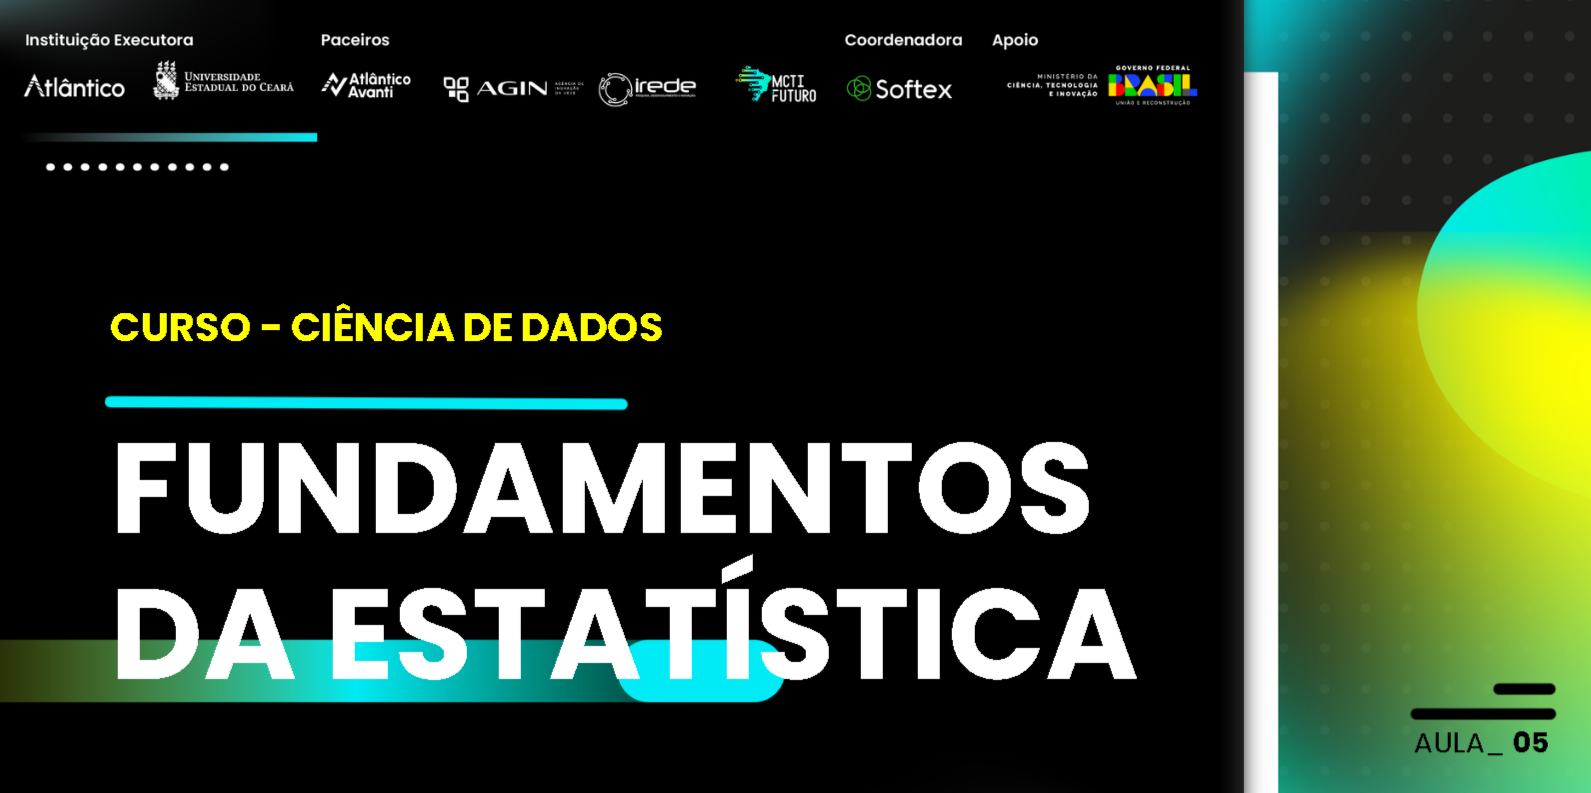

### Problema: Análise de Satisfação do Cliente para uma Empresa de e-commerce

Imagine que você está trabalhando como cientista de dados para uma empresa de e-commerce e recebeu uma base de dados de uma pesquisa de satisfação do cliente. O objetivo é entender melhor o comportamento e a satisfação dos clientes, identificar padrões e realizar inferências sobre a população de clientes com base em uma amostra.

#### Perguntas para análise

- Qual é a média e a variabilidade na satisfação dos clientes?
- Existe uma diferença significativa na satisfação entre diferentes faixas etárias ou segmentos?
- Podemos inferir que uma alta porcentagem de clientes está satisfeita?

### 1. Bibliotecas Necessárias

In [4]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import scipy.stats as stats


 1.1 - numpy: É uma biblioteca fundamental para operações numéricas em Python, especialmente útil para trabalhar com arrays e matrizes multidimensionais. NumPy permite realizar operações matemáticas rápidas e eficientes, como somas, multiplicações, transformações e cálculos matemáticos complexos em grandes conjuntos de dados.

 1.2 - pandas: É uma biblioteca poderosa para manipulação e análise de dados. Ela oferece estruturas de dados como DataFrames e Series, que facilitam o armazenamento, manipulação e análise de dados tabulares. Pandas é amplamente utilizada em tarefas como limpeza, agregação, filtragem e visualização de dados.

 1.3 - matplotlib: Uma biblioteca de visualização de dados em Python, especialmente útil para criar gráficos como linhas, barras, dispersões e histogramas. Matplotlib permite personalizar gráficos de maneira detalhada e é amplamente utilizada para explorar visualmente conjuntos de dados e interpretar resultados.


1.4 - sciPy: É uma biblioteca para cálculos científicos e matemáticos avançados. O módulo stats em particular fornece uma ampla gama de ferramentas estatísticas, como distribuições, testes estatísticos, análises de probabilidade e modelos de ajuste de dados, sendo ideal para análise estatística profunda e modelagem.

### 2. Estatística Descritiva para Entendimento dos Dados

Carregar um conjunto de dados fictício com informações de satisfação dos clientes, idade, e segmentação de mercado.

Neste exemplo, segmento representa uma classificação de clientes baseada em características ou perfis específicos que a empresa utiliza para entender melhor seu público. Em empresas de e-commerce, a segmentação de clientes é uma prática comum para identificar grupos com características e comportamentos similares, permitindo uma personalização mais eficaz das estratégias de marketing e atendimento.

No caso da nossa análise, imagine que os segmentos (A, B e C) poderiam representar diferentes perfis de clientes, tais como:

- Segmento A: Clientes frequentes, que compram mais de uma vez por mês.
- Segmento B: Clientes sazonais, que compram em épocas específicas, como datas comemorativas.
- Segmento C: Novos clientes ou clientes eventuais, que compraram poucas vezes.

Esses segmentos ajudam a identificar se a satisfação varia conforme o perfil do cliente. Por exemplo, podemos investigar se clientes frequentes (Segmento A) estão mais satisfeitos em relação aos novos clientes (Segmento C). Isso é útil para a empresa entender e ajustar estratégias, como melhorar a experiência para novos clientes ou manter a fidelidade dos clientes frequentes.

No dataset fictício, os segmentos são identificados com letras (A, B, C) para simplificação, mas na prática, eles poderiam ser identificados de várias maneiras, dependendo das características de cada grupo.

In [5]:
data = pd.DataFrame({
    'idade': np.random.randint(18, 70, size=200),
    'satisfacao': np.random.randint(1, 6, size=200),  # Satisfação em escala de 1 a 5
    'segmento': np.random.choice(["A", "B", "C"], size=200),
    })

print(data)


     idade  satisfacao segmento
0       31           1        C
1       21           3        C
2       40           2        B
3       66           3        B
4       22           3        A
..     ...         ...      ...
195     55           2        B
196     26           5        A
197     25           4        C
198     28           1        B
199     56           1        B

[200 rows x 3 columns]


In [6]:
print(data.describe())

            idade  satisfacao
count  200.000000  200.000000
mean    43.050000    2.965000
std     14.610779    1.357568
min     18.000000    1.000000
25%     30.000000    2.000000
50%     43.500000    3.000000
75%     56.000000    4.000000
max     69.000000    5.000000


### 2.1  Medidas de Tendência Central

Vamos calcular as medidas de tendência central para cada segmento de clientes (A, B e C). Essas medidas incluem a média, mediana e moda, que nos dão uma visão da satisfação central para cada grupo.

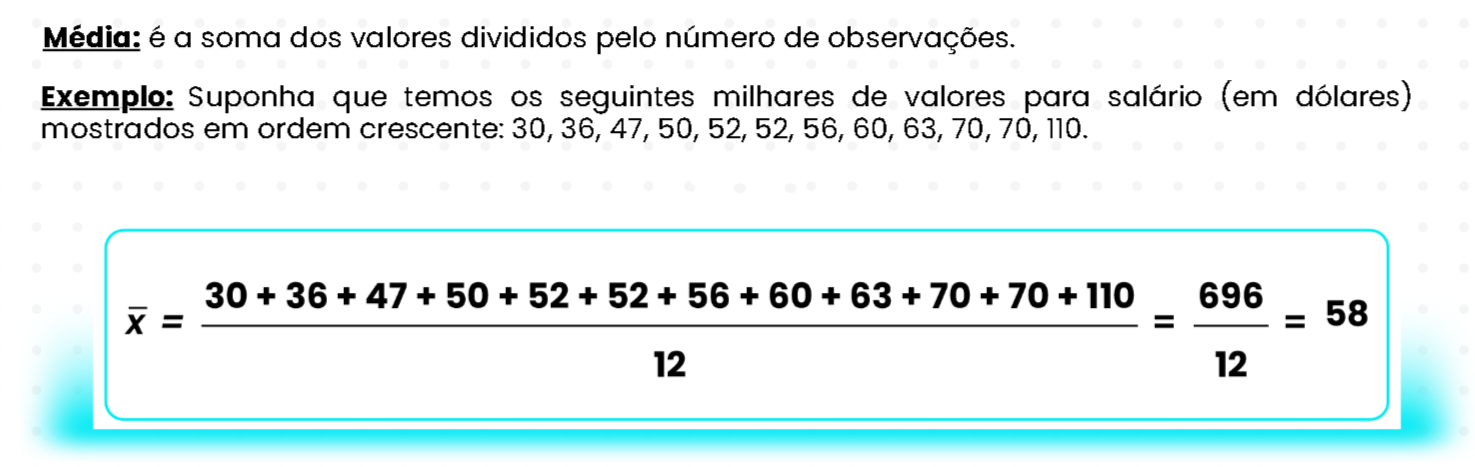

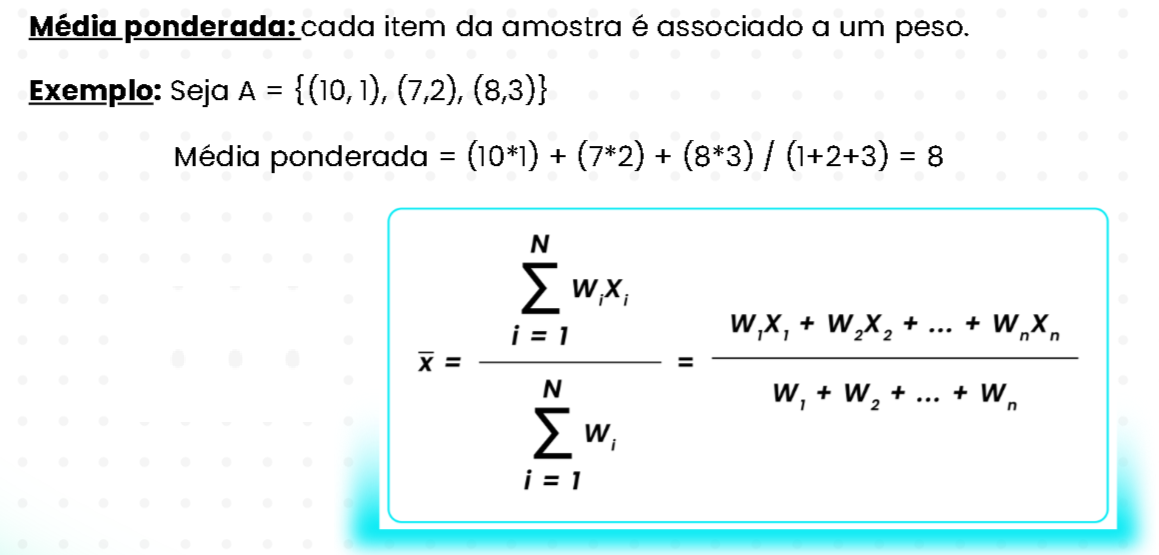

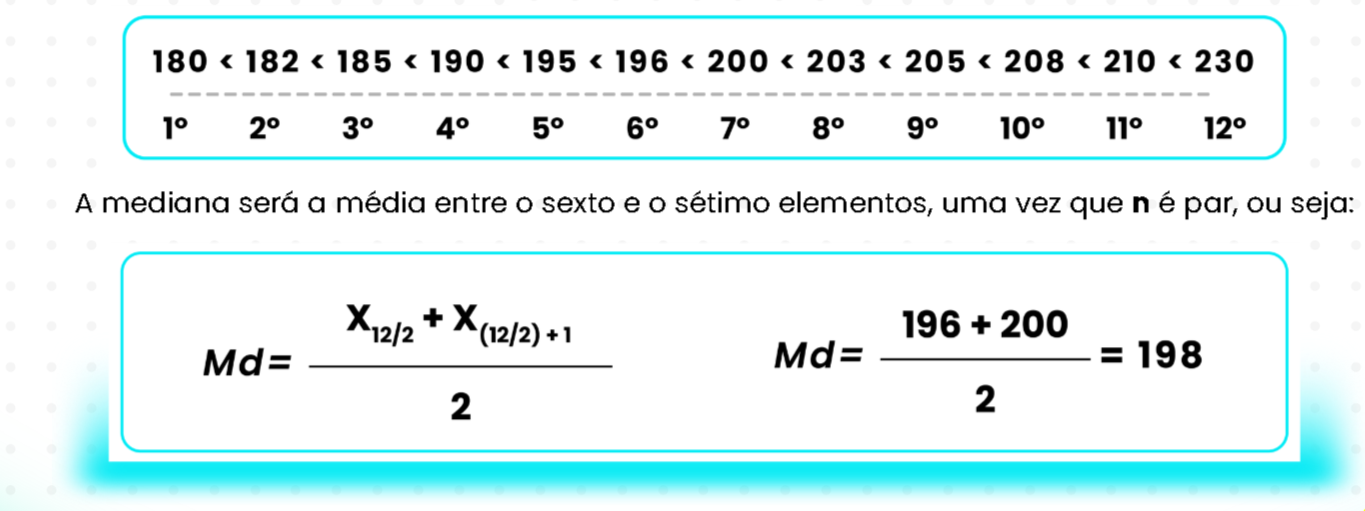

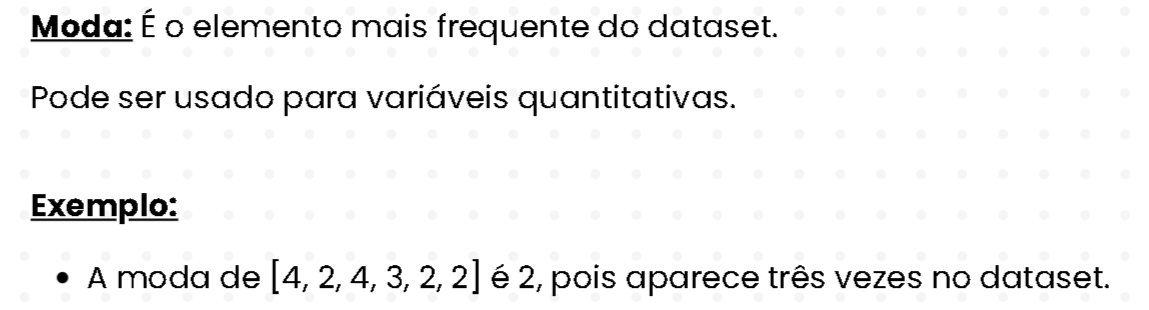

In [7]:
listaMedias = []
listaMedianas = []
listaModas = []
segmentos = sorted(data['segmento'].unique()) # unique: é usado para obter todos os valores únicos (ou seja, sem duplicação)
# Calcule a média, mediana e moda para cada segmento
for segmento in segmentos :
    segmento_data = data[data['segmento'] == segmento]['satisfacao']

    media = segmento_data.mean()
    mediana = segmento_data.median()
    moda = segmento_data.mode().iloc[0]  # Usamos iloc para pegar o primeiro valor, caso haja múltiplas modas
    listaMedias.append(media)
    listaMedianas.append(mediana)
    listaModas.append(moda)

    print(f"Segmento {segmento}:")
    print(f"  Média de Satisfação: {media}")
    print(f"  Mediana de Satisfação: {mediana}")
    print(f"  Moda de Satisfação: {moda}")
    print("\n")

Segmento A:
  Média de Satisfação: 3.1607142857142856
  Mediana de Satisfação: 3.0
  Moda de Satisfação: 3


Segmento B:
  Média de Satisfação: 3.013888888888889
  Mediana de Satisfação: 3.0
  Moda de Satisfação: 3


Segmento C:
  Média de Satisfação: 2.763888888888889
  Mediana de Satisfação: 2.0
  Moda de Satisfação: 2




In [8]:
import pandas as pd

# Dados dos segmentos
dados_segmentos = {
    "Segmento": segmentos,
    "Média de Satisfação": listaMedias,
    "Mediana de Satisfação": listaMedianas,
    "Moda de Satisfação": listaModas
}

# Criando o DataFrame
df_segmentos = pd.DataFrame(dados_segmentos)

# Exibindo o DataFrame
df_segmentos

,Segmento,Média de Satisfação,Mediana de Satisfação,Moda de Satisfação
0,A,3.160714,3.0,3
1,B,3.013889,3.0,3
2,C,2.763889,2.0,2


In [9]:
print(listaMedias[0])
print(listaMedianas[0])
print(listaModas[0])

3.1607142857142856
3.0
3


#### Discussão dos Resultados
- Média:

A média representa a satisfação média dos clientes dentro de cada segmento.
Se, por exemplo, o Segmento A tiver uma média de satisfação mais alta do que os segmentos B e C, isso pode indicar que os clientes frequentes estão mais satisfeitos com o serviço.
Uma média menor em algum segmento pode sugerir que esses clientes têm expectativas não atendidas ou experiências de compra menos satisfatórias.

- Mediana:

A mediana mostra o valor central da satisfação, o que ajuda a entender a pontuação mais comum de satisfação que divide o grupo em duas metades.
Uma mediana próxima à média indica uma distribuição simétrica das satisfações.
Se a mediana for muito diferente da média, pode haver outliers (extremos) no conjunto de dados, como clientes extremamente insatisfeitos ou extremamente satisfeitos, que influenciam a média.

- Moda:

A moda indica o valor de satisfação que ocorre com maior frequência.
Por exemplo, se a moda do Segmento C for 3 (satisfação neutra), isso pode significar que muitos dos novos clientes têm uma experiência neutra ou média.
A moda ajuda a identificar o nível de satisfação mais comum entre os clientes de cada segmento, sendo útil para observar padrões recorrentes.

### 2.2  Medidas de Dispersão

Para analisar a dispersão dos dados, vamos calcular as principais medidas de dispersão para cada segmento, o que nos ajuda a entender a variabilidade na satisfação dos clientes. Isso inclui amplitude, variância, desvio padrão e coeficiente de variação. Essas medidas oferecem uma visão mais aprofundada sobre o quanto as avaliações de satisfação se distanciam da média e da consistência dos valores.

- Amplitude:

Amplitude é a diferença entre o valor máximo e mínimo, indicando a faixa total de variação na satisfação dos clientes.
Nos ajuda a ver quão ampla é a variação nas notas, o que pode mostrar se há clientes muito insatisfeitos ou muito satisfeitos.





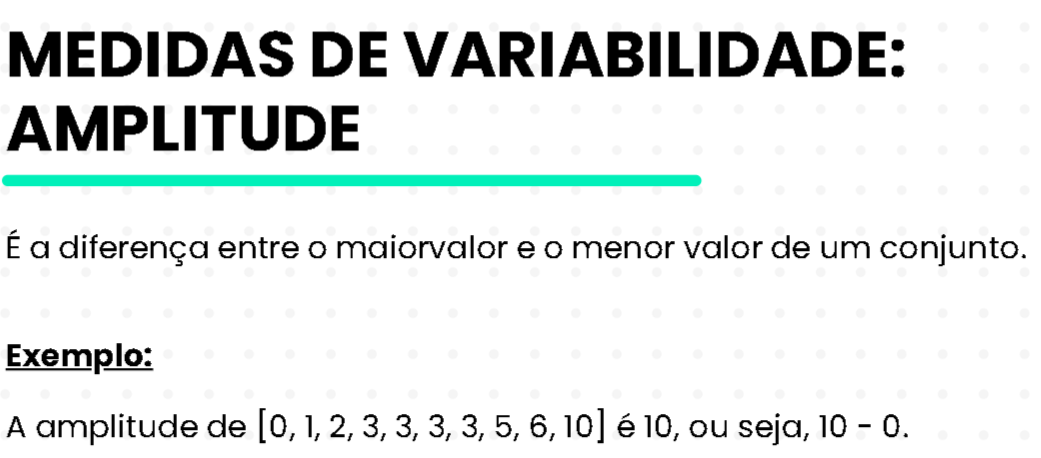

- Variância:

Variância é uma medida da média dos desvios ao quadrado da média.
Quanto maior a variância, maior a dispersão dos valores em relação à média.
É útil para entender a variabilidade geral, mas como está em unidades ao quadrado, muitas vezes usamos o desvio padrão para interpretação mais intuitiva.

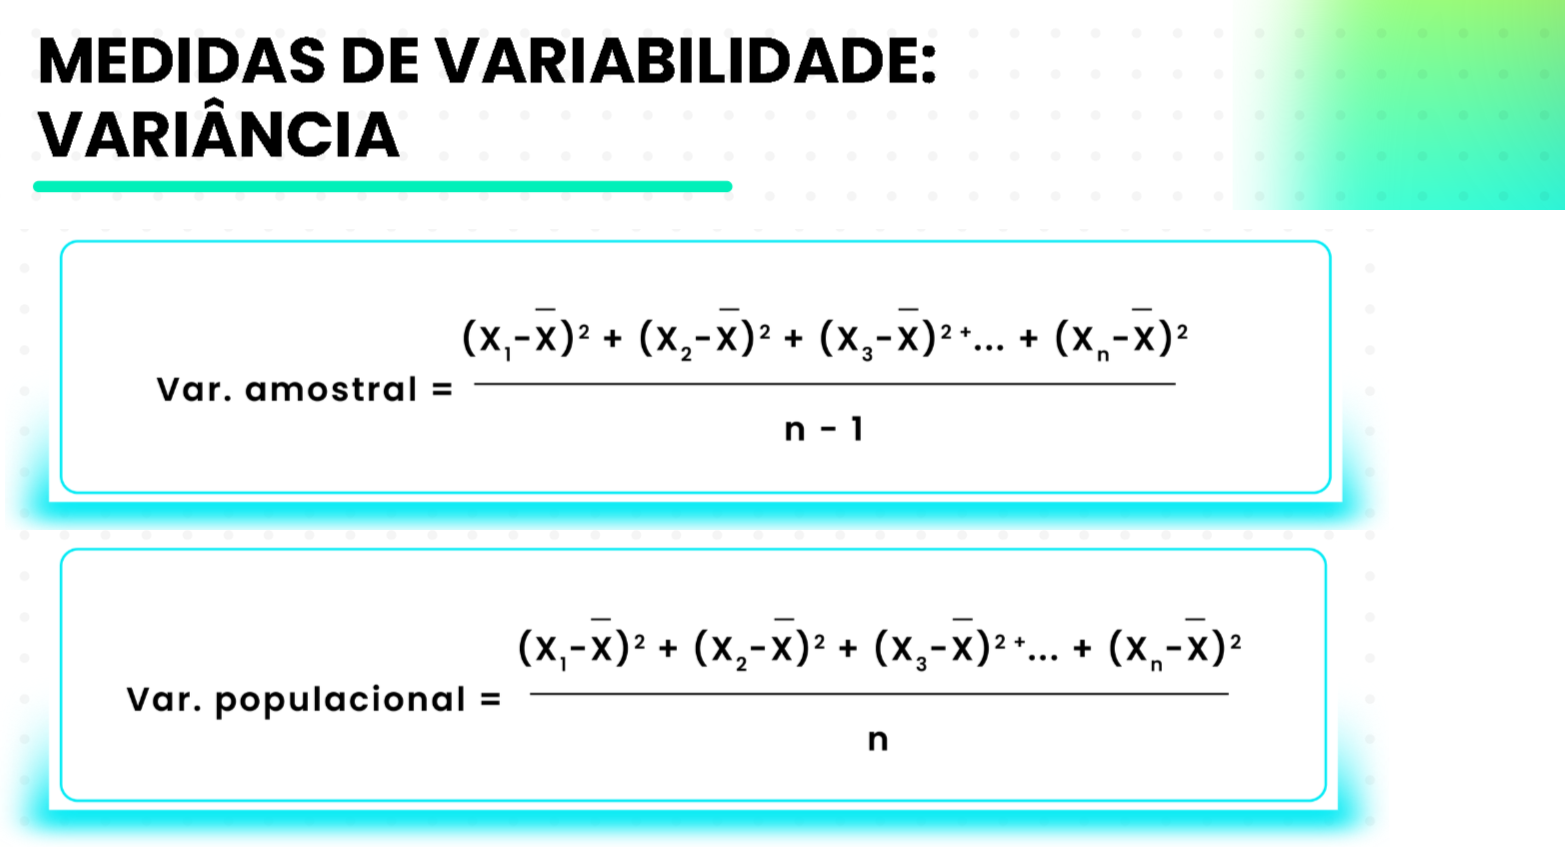

- Desvio Padrão:

Desvio padrão é a raiz quadrada da variância e fornece uma medida de dispersão no mesmo nível dos dados originais.
Indica o quão distante, em média, cada valor está da média.

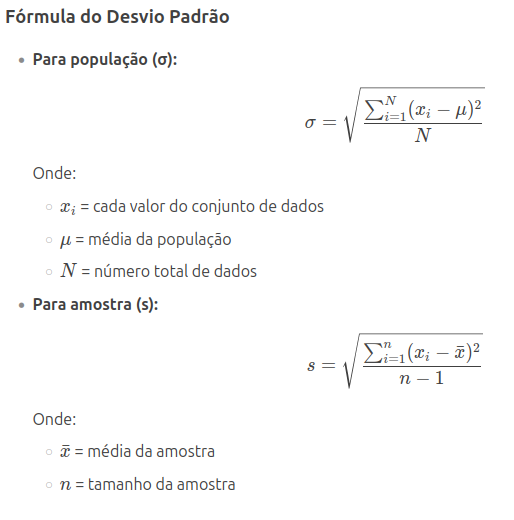

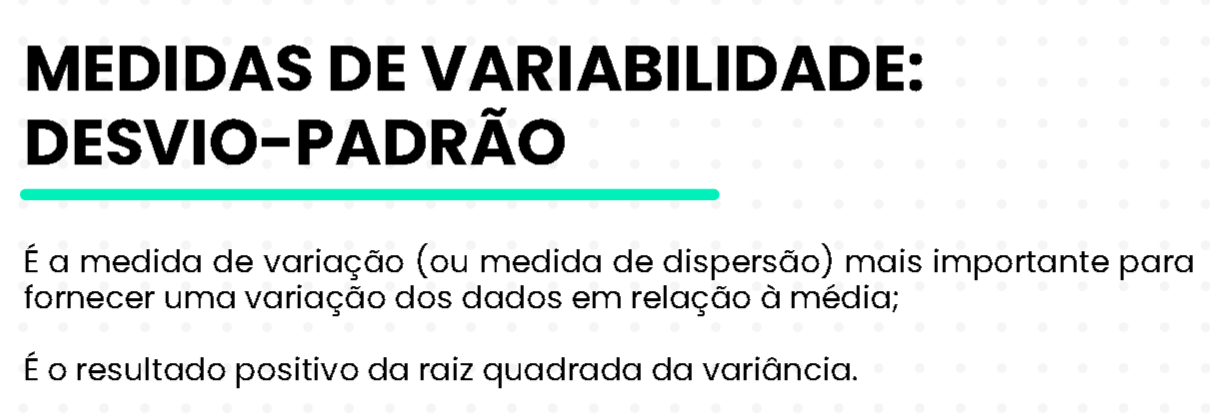

- Coeficiente de Variação (CV):

Coeficiente de variação é calculado como o desvio padrão dividido pela média.
É útil para comparar a variabilidade entre conjuntos de dados com médias diferentes, fornecendo uma medida relativa da dispersão.


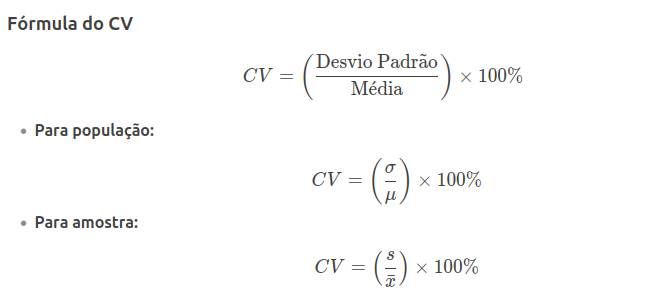

Interpretação do CV

    CV baixo (ex.: < (0.15) 15%): Baixa dispersão relativa (dados homogêneos).

    CV moderado (ex.: (0.15) 15% a (0.30) 30%): Dispersão intermediária.

    CV alto (ex.: > (0.30) 30%): Alta dispersão relativa (dados heterogêneos).

### Vamos calcular essas medidas para cada segmento usando Python:

In [11]:
# Filtrar dados por segmento e calcular medidas de dispersão
medidas_dispersao = []

for segmento in sorted(data['segmento'].unique()):
    segmento_data = data[data['segmento'] == segmento]['satisfacao']

    amplitude = segmento_data.max() - segmento_data.min() # max() retorna valor máximo e min() valor mínimo
    variancia = segmento_data.var() # var() função para calcular a variancia
    desvio_padrao = segmento_data.std() # std() função para caluclar o desvio padrão
    coeficiente_variacao = desvio_padrao / segmento_data.mean() if segmento_data.mean() != 0 else 0

    medidas_dispersao.append({
        "Segmento": segmento,
        "Amplitude": amplitude,
        "Variância": variancia,
        "Desvio Padrão": desvio_padrao,
        "Coeficiente de Variação": coeficiente_variacao
    })

df_dispersao = pd.DataFrame(medidas_dispersao)

# Exibindo o DataFrame com as medidas de dispersão
df_dispersao


,Segmento,Amplitude,Variância,Desvio Padrão,Coeficiente de Variação
0,A,4,1.628247,1.276028,0.403715
1,B,4,1.901213,1.378845,0.457497
2,C,4,1.929382,1.389022,0.502561


Interpretação do CV

    CV alto (ex.: > 30%): Para os três segmentos

Os resultados indicam que os três segmentos (A, B e C) possuem a mesma amplitude (4), mas diferem significativamente em variabilidade.

O segmento A apresenta a menor dispersão, com desvio padrão de 1,28 e coeficiente de variação (CV) de 40,4%, sugerindo uma variabilidade moderada-alta.

Já os segmentos B e C mostram maior dispersão, com desvios padrão de 1,38 e 1,39 e CVs de 45,8% e 50,3%, respectivamente, indicando alta heterogeneidade nos dados.

O CV especialmente elevado do segmento C (50,3%) revela que os valores estão muito distantes da média, sinalizando inconsistência ou possíveis outliers. Isso sugere que, enquanto o segmento A é relativamente mais estável, os segmentos B e C exigem investigação mais aprofundada para identificar causas dessa alta variabilidade, como a presença de subgrupos distintos ou problemas no processo de coleta de dados.

### 3. Conceitos de Probabilidade Básica


- Espaço Amostral (S):

O espaço amostral representa o conjunto de todos os possíveis resultados.
No nosso caso, o espaço amostral é composto por todas as avaliações de satisfação dos clientes para cada segmento. Se estamos analisando, por exemplo, a satisfação dos clientes do Segmento A, o espaço amostral
(S) será o conjunto de todas as notas de satisfação dos clientes nesse segmento.


- Eventos:

Um evento é um subconjunto do espaço amostral. Por exemplo:

###### Evento A: Um cliente do Segmento A deu uma nota maior que 3 (ou seja, está relativamente satisfeito).
###### Evento B: Um cliente do Segmento B deu uma nota menor ou igual a 2 (indicando insatisfação).
###### Evento C: Um cliente do Segmento C deu uma nota igual a 5 (máxima satisfação).

Esses eventos podem ser definidos para responder a perguntas específicas sobre a satisfação dos clientes.

- Probabilidade de um Evento:

A probabilidade de um evento é a razão entre o número de resultados favoráveis ao evento e o número total de resultados no espaço amostral.

Por exemplo, a probabilidade de um cliente do Segmento A dar uma nota maior que 3 (Evento A) é o número de clientes do Segmento A que deram nota maior que 3, dividido pelo número total de clientes no Segmento A.



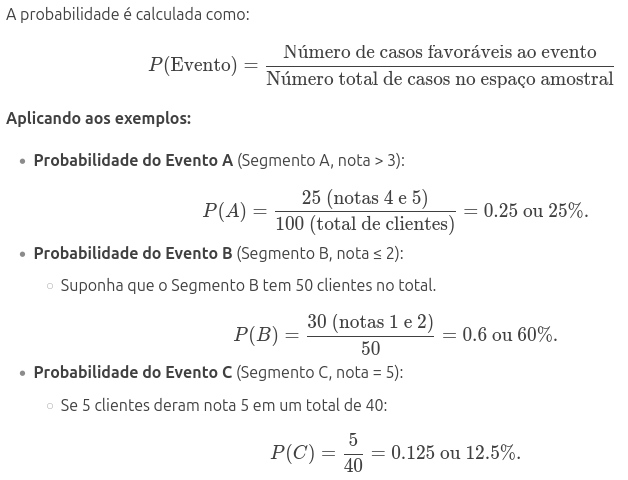

## Tabela Resumo
| Conceito          | Definição                          | Exemplo Segmento A       | Probabilidade |
|-------------------|-----------------------------------|--------------------------|---------------|
| **Espaço Amostral** | Todos os resultados possíveis.    | `S = {1, 2, 3, 4, 5}`    | —             |
| **Evento A**       | Nota > 3 (satisfação relativa)    | `{4, 5}` (100 clientes)   | 25%           |
| **Evento B**       | Nota ≤ 2 (insatisfação)           | `{1, 2}` (50 clientes)  | 60%          |
| **Evento C**       | Nota = 5 (satisfação máxima)      | `{5}` (40 clientes)      | 12.5%        |



### Vamos calcular algumas probabilidades no contexto dos segmentos, usando os dados de satisfação.

In [12]:
# Contagem do número total de avaliações em cada segmento
total_A = len(data[data['segmento'] == 'A'])
total_B = len(data[data['segmento'] == 'B'])
total_C = len(data[data['segmento'] == 'C'])

# Definindo eventos e calculando probabilidades

# Evento A: Cliente do Segmento A deu uma nota maior que 3
evento_A_favoraveis = len(data[(data['segmento'] == 'A') & (data['satisfacao'] > 3)])
prob_evento_A = evento_A_favoraveis / total_A

# Evento B: Cliente do Segmento B deu uma nota menor ou igual a 2
evento_B_favoraveis = len(data[(data['segmento'] == 'B') & (data['satisfacao'] <= 2)])
prob_evento_B = evento_B_favoraveis / total_B

# Evento C: Cliente do Segmento C deu uma nota igual a 5
evento_C_favoraveis = len(data[(data['segmento'] == 'C') & (data['satisfacao'] == 5)])
prob_evento_C = evento_C_favoraveis / total_C

# Exibindo as probabilidades
print(f"Probabilidade de um cliente do Segmento A dar uma nota maior que 3: {prob_evento_A:.2f}")
print(f"Probabilidade de um cliente do Segmento B dar uma nota menor ou igual a 2: {prob_evento_B:.2f}")
print(f"Probabilidade de um cliente do Segmento C dar uma nota igual a 5: {prob_evento_C:.2f}")


Probabilidade de um cliente do Segmento A dar uma nota maior que 3: 0.43
Probabilidade de um cliente do Segmento B dar uma nota menor ou igual a 2: 0.38
Probabilidade de um cliente do Segmento C dar uma nota igual a 5: 0.17


Análise de Satisfação por Segmento:

    Segmento A: 43% dos clientes deram nota acima de 3, indicando satisfação moderada.

    Segmento B: 38% atribuíram nota ≤ 2, sinalizando insatisfação relevante.

    Segmento C: Apenas 17% concederam nota máxima (5), sugerindo oportunidades para melhorar a experiência.

###  Vamos estender a análise com o conceito de probabilidade condicional para fornecer uma visão mais detalhada de como certos eventos dependem de outros no contexto dos segmentos de satisfação dos clientes.

### Essa definição é útil para calcular a probabilidade de satisfação específica entre clientes que já pertencem a um segmento particular.

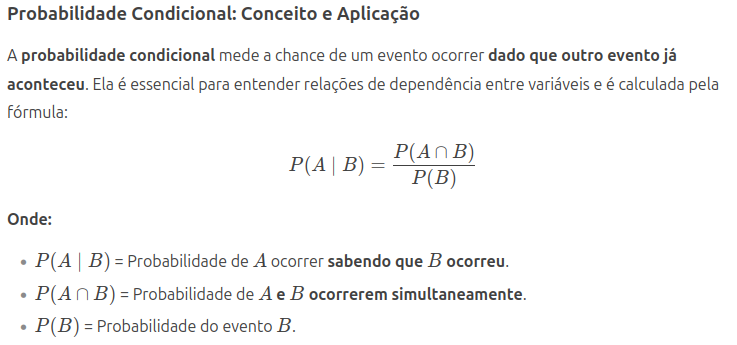

Para calcular essa probabilidade, precisamos:

- Contar o número de clientes que deram nota maior que 3 e estão no Segmento A (𝑃(𝐴 ∩ 𝐵)).
- Dividir pelo total de clientes que deram nota maior que 3 (𝑃(𝐵)).

In [13]:
# Evento: Cliente deu uma nota maior que 3 (Evento B)
total_nota_maior_3 = len(data[data['satisfacao'] > 3])

# Evento: Cliente pertence ao Segmento A e deu uma nota maior que 3 (Evento A ∩ B)
evento_A_e_B = len(data[(data['segmento'] == 'A') & (data['satisfacao'] > 3)])

# Probabilidade condicional: Cliente pertence ao Segmento A dado que deu nota maior que 3
prob_A_dado_nota_maior_3 = evento_A_e_B / total_nota_maior_3

print(f"Probabilidade de um cliente ser do Segmento A dado que ele deu uma nota maior que 3: {prob_A_dado_nota_maior_3:.2f}")


Probabilidade de um cliente ser do Segmento A dado que ele deu uma nota maior que 3: 0.32


#### Interpretação dos Resultados

Relação Entre Segmento e Satisfação:

Entre todos os clientes satisfeitos (nota > 3), 32% pertencem ao Segmento A. Isso não significa que 32% do Segmento A está satisfeito (seria P(Nota>3∣Segmento A)P(Nota>3∣Segmento A)), mas sim que, dentre os satisfeitos, 32% são do Segmento A.

Comparação com Outros Segmentos:

Se a mesma probabilidade for menor para os Segmentos B e C (ex.: 25% e 20%), o Segmento A tem maior representatividade entre clientes satisfeitos.
Isso sugere que o perfil do Segmento A (ex.: clientes frequentes, demografia específica) está mais associado à satisfação.

Aplicações Práticas:

Priorizar ações: Se o Segmento A é o mais representativo entre satisfeitos, vale investir em estratégias que mantêm suas características (ex.: benefícios exclusivos).
Diagnosticar problemas: Se outro segmento tem baixa probabilidade condicional (ex.: Segmento C com 10%), investigar por que seus clientes estão menos satisfeitos.

### 4. Inferência Estatística


Para aplicar o conceito de inferência estatística ao problema da satisfação dos clientes, vamos explorar duas ferramentas comuns:

- intervalos de confiança
- testes de hipóteses.

Essas técnicas nos permitem fazer afirmações sobre a população de clientes com base nos dados da amostra de cada segmento, ajudando a generalizar os insights obtidos a partir dos dados observados.

### 4.1. Intervalos Confiança


Um intervalo de confiança estima a faixa de valores onde a verdadeira satisfação média de um segmento de clientes provavelmente está. Por exemplo, se o Segmento A tem um intervalo de confiança de 3.2 a 4.1 para satisfação (com 95% de confiança), significa que há alta probabilidade de a média real desse grupo estar nessa faixa. Isso ajuda a:

- Evitar conclusões precipitadas (não confiar apenas na média amostral).

- Comparar segmentos (se os intervalos não se sobrepõem, há diferença significativa).

- Tomar decisões (se o limite superior está abaixo do desejado, o grupo precisa de ações).

É como ter uma "margem de segurança" para generalizar resultados da amostra para toda a população de clientes.

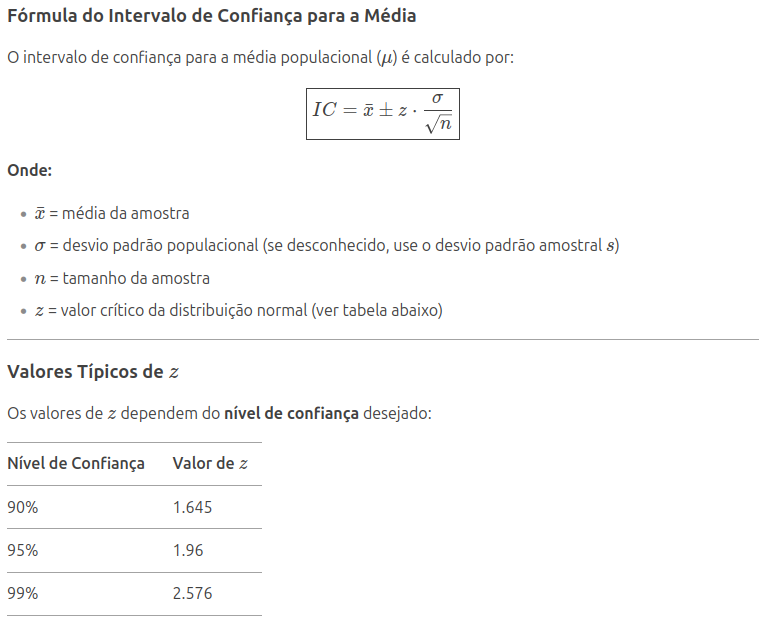

Para calcular o intervalo de confiança de 95% para cada segmento:

In [14]:
from scipy import stats
import numpy as np

# Criando uma função para calcular intervalo de confiança de 95%
def intervalo_de_confianca(media, desvio_padrao, n, nivel=0.95):
    z = stats.norm.ppf(1 - (1 - nivel) / 2)  # valor crítico para 95% de confiança
    margem_erro = z * (desvio_padrao / np.sqrt(n))
    return media - margem_erro, media + margem_erro

# Calculando intervalo de confiança para cada segmento
resultados_ic = []

for segmento in sorted(data['segmento'].unique()):
    segmento_data = data[data['segmento'] == segmento]['satisfacao']
    media = segmento_data.mean()
    desvio_padrao = segmento_data.std()
    n = len(segmento_data)
    ic_inferior, ic_superior = intervalo_de_confianca(media, desvio_padrao, n)

    resultados_ic.append({
        "Segmento": segmento,
        "Intervalo de Confiança Inferior": ic_inferior,
        "Intervalo de Confiança Superior": ic_superior
    })

# Exibindo os resultados
df_ic = pd.DataFrame(resultados_ic)
df_ic


,Segmento,Intervalo de Confiança Inferior,Intervalo de Confiança Superior
0,A,2.826508,3.494920
1,B,2.695398,3.332380
2,C,2.443047,3.084731


##### Interpretação dos Resultados do Intervalo de Confiança

Os intervalos de confiança revelam que, com 95% de confiança, a satisfação média dos segmentos varia entre 2.83-3.49 (A), 2.70-3.33 (B) e 2.44-3.08 (C), mostrando que nenhum segmento atinge níveis altos de satisfação (acima de 4).

O Segmento C apresenta os piores resultados, com sua média superior (3.08) ficando abaixo até dos limites inferiores dos outros segmentos, indicando necessidade urgente de intervenções.

Já os Segmentos A e B, apesar de terem desempenhos relativamente melhores (com A ligeiramente superior a B), ainda possuem margem para melhorias, sugerindo que estratégias específicas podem ser desenvolvidas para elevar a satisfação em todos os grupos, priorizando ações corretivas para o Segmento C e otimizações para A e B.

### 4.2. Teste de Hipóteses

Para entender se há uma diferença significativa entre a média de satisfação dos segmentos, podemos usar um teste de hipóteses. Neste caso, vamos verificar se a satisfação média de dois segmentos é significativamente diferente.

Para entender se há uma diferença significativa entre a média de satisfação dos segmentos, podemos usar um teste de hipóteses. Neste caso, vamos verificar se a satisfação média de dois segmentos é significativamente diferente.


###### Exemplo de Hipótese

Vamos testar se há uma diferença significativa entre a média de satisfação dos Segmentos A e B.

- Hipótese Nula (H0): A média de satisfação do Segmento A é igual à do Segmento B.
- Hipótese Alternativa (H1): A média de satisfação do Segmento A é diferente da do Segmento B.

Usamos o teste t para duas amostras independentes para comparar as médias dos dois segmentos.

In [15]:
# Definindo os dados para os dois segmentos
satisfacao_A = data[data['segmento'] == 'A']['satisfacao']
satisfacao_B = data[data['segmento'] == 'B']['satisfacao']

# Realizando o teste t
t_stat, p_value = stats.ttest_ind(satisfacao_A, satisfacao_B)

# Exibindo os resultados
print(f"Estatística t: {t_stat:.2f}")
print(f"Valor-p: {p_value:.4f}")


Estatística t: 0.62
Valor-p: 0.5382


##### Interpretação dos Resultados do Teste de Hipóteses

Com uma estatística t de 0.62 e valor-p de 0.5382, não há evidências estatísticas para rejeitar a hipótese nula (H0​) de que as médias de satisfação dos Segmentos A e B são iguais. O valor-p muito acima do limiar comum de 0.05 (5%) indica que a diferença observada entre as médias pode ser atribuída ao acaso, e não a uma distinção real entre os segmentos.


##### Usando inferência estatística, conseguimos fazer afirmações sobre a população com base nas amostras.

A inferência estatística nos permite tirar conclusões sobre toda a população de clientes analisando apenas amostras, usando duas ferramentas principais: os intervalos de confiança, que estimam a faixa provável da satisfação média real de cada segmento (como 2.8-3.5 para o Segmento A), e os testes de hipóteses, que verificam se diferenças entre segmentos são estatisticamente significativas ou apenas aleatórias. Essas análises são fundamentais para identificar quais grupos realmente precisam de intervenções, evitar investimentos desnecessários em melhorias e direcionar estratégias de forma eficiente, transformando dados em decisões práticas que elevam a satisfação dos clientes.